In [2]:
#Load Tools and dependencies

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
data = pd.read_csv('dataset.csv')
data


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('artists', axis=1)
data = data.drop('album_name', axis=1)
data = data.drop('track_name', axis=1)
data = data.drop('mode', axis=1)
print(data.keys())


Index(['track_id', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [5]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:
data_types = data.dtypes
print(data_types)

track_id             object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [7]:
# sns.pairplot(data, height=2.5)

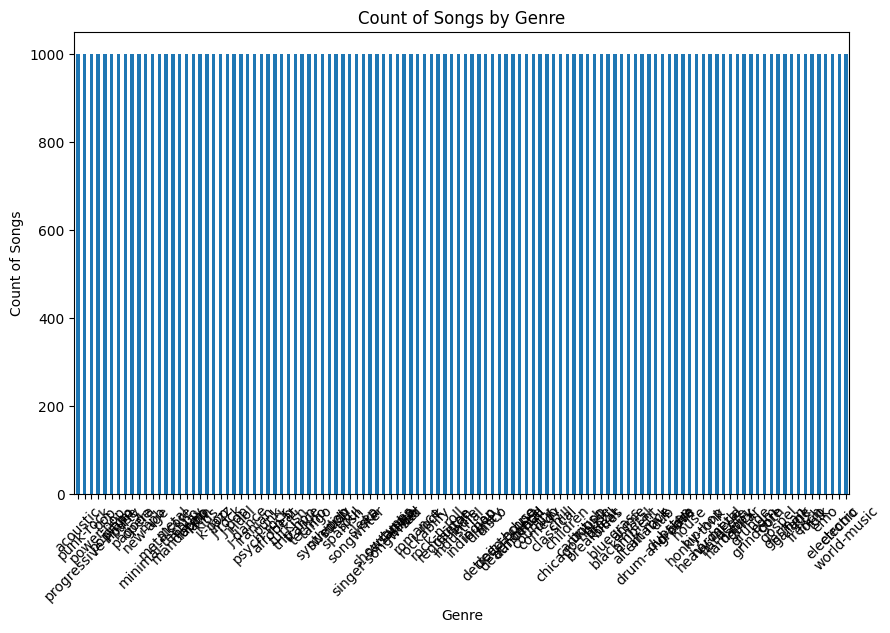

In [8]:
genre_counts = data['track_genre'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Count of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Count of Songs')
plt.xticks(rotation=45)
plt.show()

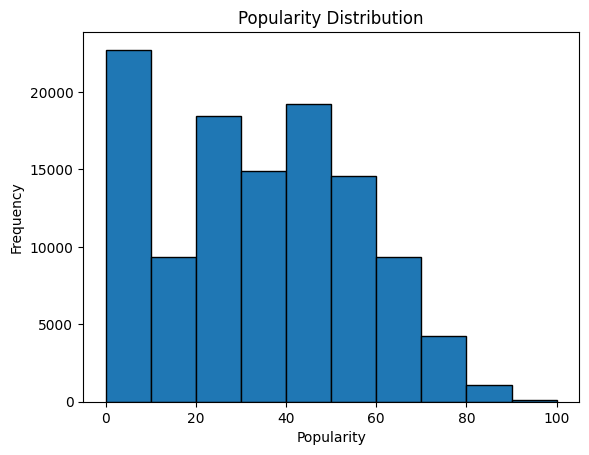

In [9]:
plt.hist(data['popularity'], edgecolor='black') # Adjust the number of bins as needed
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [10]:
def percentage_threshold_accuracy(predictions, actuals, threshold=2):
    # Calculate the absolute percentage error between predictions and actuals
    percentage_errors = np.abs(predictions - actuals) / actuals * 100
    
    # Calculate accuracy based on the threshold
    accurate_predictions = percentage_errors <= threshold
    accuracy = np.mean(accurate_predictions) * 100  # Convert to percentage
    
    return accuracy

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'track_genre' is the column for genres

def create_train_test_sets(df, genre_column='track_genre', test_samples_per_genre=150):
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()

    grouped = df.groupby(genre_column)

    for genre, group in grouped:
        if len(group) <= test_samples_per_genre:
            test_subset = group
        else:
            test_subset, _ = train_test_split(group, test_size=test_samples_per_genre, random_state=42)

        test_set = pd.concat([test_set, test_subset], ignore_index=True)
        train_subset = group.drop(test_subset.index)
        train_set = pd.concat([train_set, train_subset], ignore_index=True)

    return train_set, test_set
# Example usage:

train_set, test_set = create_train_test_sets(data)

# This code will work assuming the DataFrame 'df' is defined and contains a 'track_genre' column.
# Please provide your dataset to execute this code with your data.



In [12]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Update the categorical_transformer to use OrdinalEncoder

# Combine preprocessing steps

# Define your target variable and features
target = 'popularity'
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Remove the target and non-feature columns from your features lists
numeric_features.remove(target)
categorical_features.remove('track_id')  # Assuming 'track_id' is not a feature

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Using the stratified sampling function to create training and test sets
train_set, test_set = create_train_test_sets(data, genre_column='track_genre', test_samples_per_genre=150)

# Split data into features and target
X_train = train_set.drop([target, 'track_id'], axis=1)  # Exclude target and non-feature columns
y_train = train_set[target]
X_test = test_set.drop([target, 'track_id'], axis=1)
y_test = test_set[target]



Accuracy within 3%: 2.5552115583075334%
Mean Squared Error: 411.9394607328964


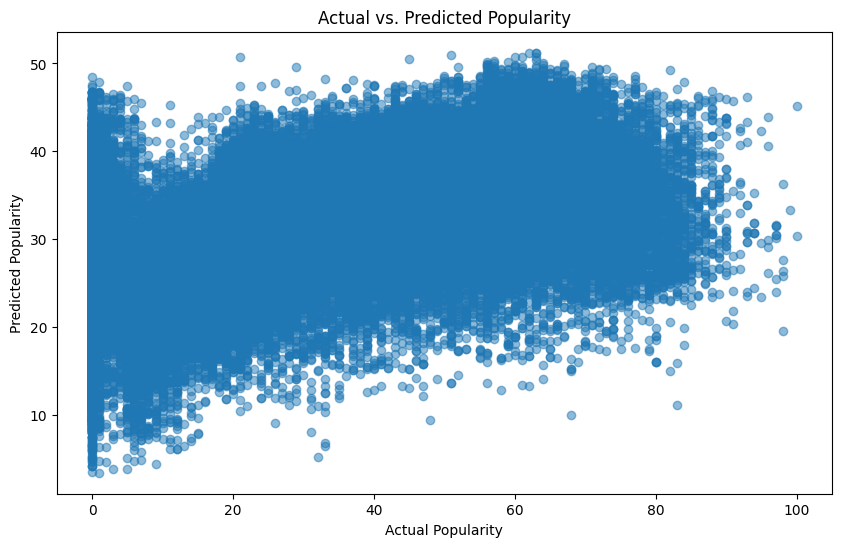

In [13]:
# Create the regression model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor())])


# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = percentage_threshold_accuracy(y_test, y_pred)
print(f'Accuracy within 3%: {accuracy}%')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.plot()
plt.show()

In [14]:
X_pro = preprocessor.fit(X_train)
Xpt = X_pro.transform(X_train)
Xpt

array([[ 1.52273586e-01,  3.47728423e-01, -1.11523361e+00, ...,
        -7.58077849e-01,  2.23812968e-01,  0.00000000e+00],
       [-1.16474654e-01,  3.00994409e-02, -7.53474338e-01, ...,
         5.92645132e-01,  2.23812968e-01,  0.00000000e+00],
       [ 6.96561128e-01,  1.08693769e+00, -7.53474338e-01, ...,
        -8.21630170e-02,  2.23812968e-01,  0.00000000e+00],
       ...,
       [ 1.01486142e+00, -2.12977764e+00, -1.53662353e+00, ...,
        -1.10721947e+00,  2.23812968e-01,  1.13000000e+02],
       [ 1.47831830e+00, -2.27992952e+00, -1.62408182e+00, ...,
         1.16872187e-01,  2.53213730e+00,  1.13000000e+02],
       [ 5.22027051e-01,  1.16725527e-01, -5.46754754e-01, ...,
         4.51056821e-01,  2.23812968e-01,  1.13000000e+02]])

Accuracy within 3%: 6.040247678018576%
Mean Squared Error: 685.5726093724039


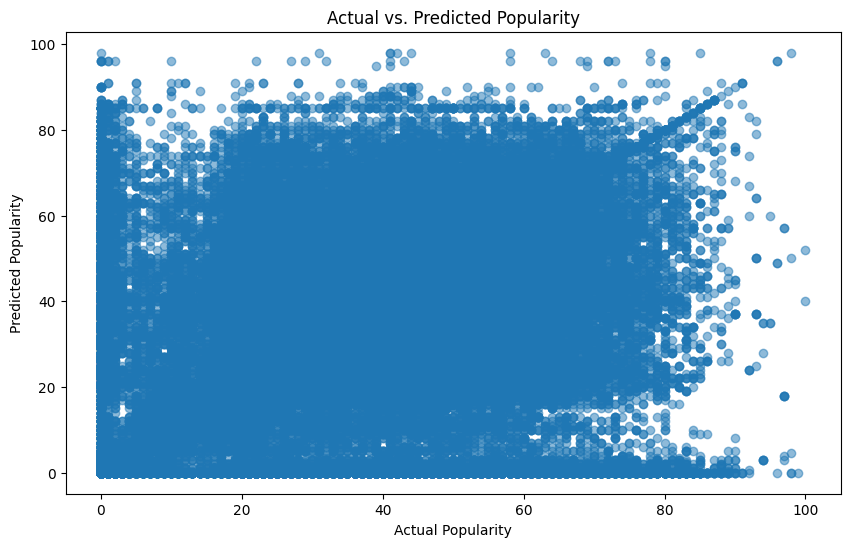

In [15]:
from sklearn import tree

treeclf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', tree.DecisionTreeRegressor())])
treeclf = treeclf.fit(X_train, y_train)

y_pred = treeclf.predict(X_test)
accuracy = percentage_threshold_accuracy(y_test, y_pred)
print(f'Accuracy within 3%: {accuracy}%')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.plot()
plt.show()



In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# define the range of hyperparameters to search over
param_grid = {#'regressor__C': [10, 50, 100],
              'regressor__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              #'degree': [2, 3, 4],
              #'gamma': ['scale', 'auto', 0.1, 1, 10],
              #'class_weight': [None, 'balanced'],
              }

# create an SVM object
svm = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', SVR())])

# create a GridSearchCV object
SVC1 = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1)

# fit the GridSearchCV object to the data
SVC1.fit(X_train, y_train)

# print the best hyperparameters
print(SVC1.best_params_)

C:\Users\jackb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


{'regressor__kernel': 'linear'}


Accuracy within 3%: 2.301341589267286%
Mean Squared Error: 492.5756888717642


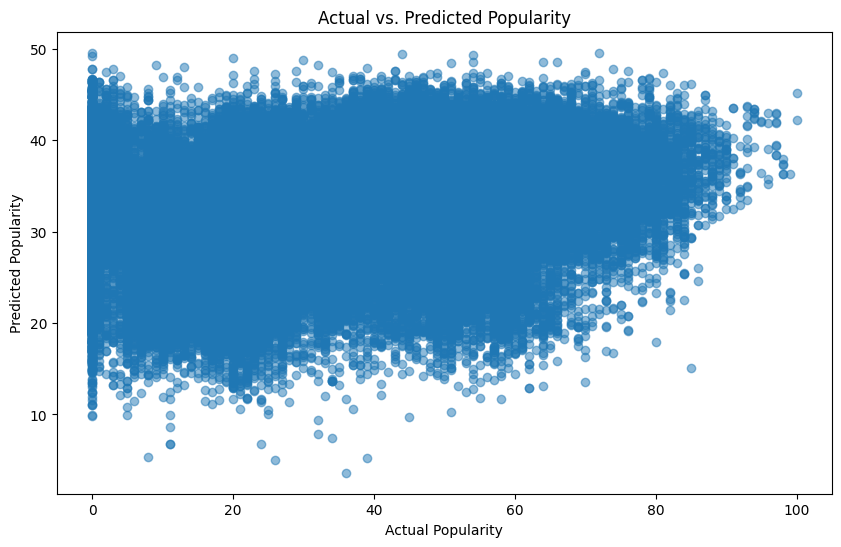

In [17]:
y_pred = SVC1.predict(X_test)
accuracy = percentage_threshold_accuracy(y_test, y_pred)
print(f'Accuracy within 3%: {accuracy}%')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.plot()
plt.show()



In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Assuming 'preprocessor' is defined somewhere above in your code

# Corrected definition of the range of hyperparameters to search over
param_grid = {
    'regressor__min_samples_leaf': [2, 50, 100]  # Corrected parameter name and value types
}

# create an SVM object
RFreg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

# create a GridSearchCV object
RFreg1 = GridSearchCV(RFreg, param_grid, cv=3, n_jobs=-1)

# fit the GridSearchCV object to the data
RFreg1.fit(X_train, y_train)

# print the best hyperparameters
print(RFreg1.best_params_)


C:\Users\jackb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


{'regressor__min_samples_leaf': 2}


Accuracy within 3%: 3.3457172342621257%
Mean Squared Error: 340.0499258760564


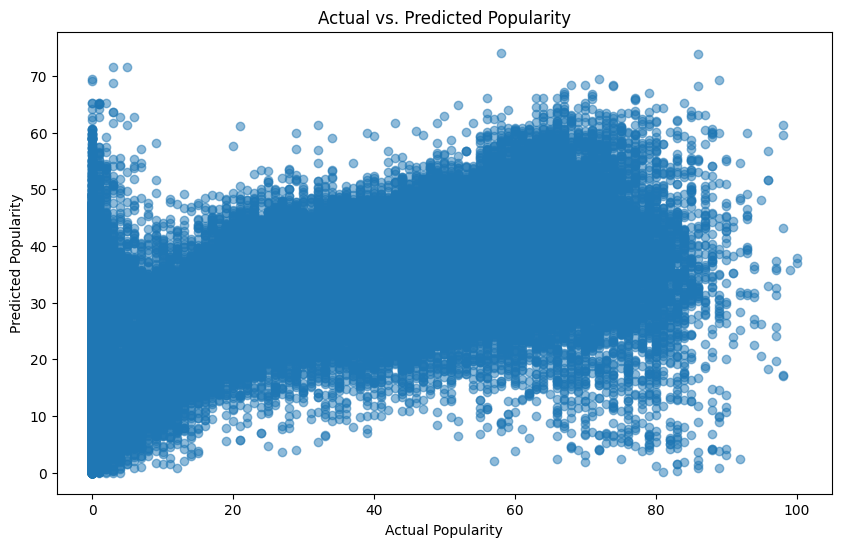

In [19]:
y_pred = RFreg1.predict(X_test)
accuracy = percentage_threshold_accuracy(y_test, y_pred)
print(f'Accuracy within 3%: {accuracy}%')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.plot()
plt.show()

In [ ]:
y_train

0        74
1         0
2         1
3         0
4         0
         ..
17095    21
17096    22
17097    21
17098    21
17099    41
Name: popularity, Length: 17100, dtype: int64

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

num_epochs = 2

# 1. Preprocess the data
X_processed_train = preprocessor.fit_transform(X_train)
y_processed_train = y_train
 # Assuming y is a single-column DataFrame or Series

# 2. Convert to tensors
X_tensor = torch.tensor(X_processed_train, dtype=torch.float32)
y_tensor = torch.tensor(y_processed_train, dtype=torch.float32)

# Create a TensorDataset and DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# 3. Define the neural network
class RegressionNN(torch.nn.Module):
    def __init__(self):
        super(RegressionNN, self).__init__()
        self.layer1 = torch.nn.Linear(X_processed_train.shape[1], 64)  # Input layer
        self.layer2 = torch.nn.Linear(64, 32)  # Hidden layer
        self.output_layer = torch.nn.Linear(32, 1)  # Output layer

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

RegNN = RegressionNN()

# 4. Training (simplified)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(RegNN.parameters(), lr=0.001)  # Use RegNN instead of model

# Simplified training loop
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = RegNN(inputs)  # Use RegNN instead of model
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()




C:\Users\jackb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\jackb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Accuracy within 2%: 1.1207430340557276%
Mean Squared Error: 498.63425899697603


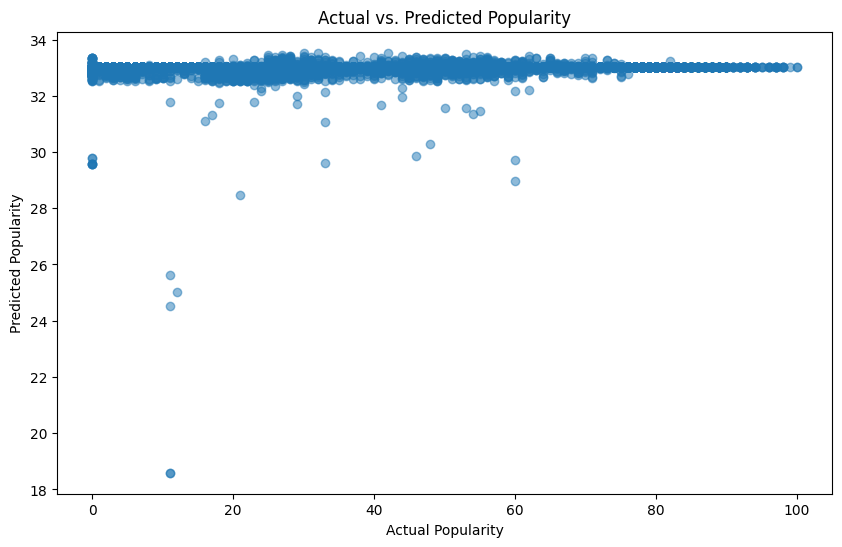

In [ ]:
X_processed_test = preprocessor.fit_transform(X_test)
#X_processed_test = preprocessor.fit_transform(X_test)

# 2. Convert to tensors
# X_tensor_test = torch.tensor(X_processed_test, dtype=torch.float)
y_tensor_test = torch.tensor(y_test, dtype=torch.float)

# Instead of using .predict(), directly call the model on your input tensor
# Ensure to switch the model to evaluation mode before making predictions
RegNN.eval()  # Set the model to evaluation mode

# Use torch.no_grad() to disable gradient computation and backpropagation
with torch.no_grad():
    # Direct conversion to tensor without calling .toarray()
    X_tensor_test = torch.tensor(X_processed_test, dtype=torch.float32)
    y_pred_tensor = RegNN(X_tensor_test)
    y_pred = y_pred_tensor.detach().cpu().numpy()

# Assuming percentage_threshold_accuracy and mean_squared_error are defined and y_test is available
# If y_test is a tensor, you might need to convert it to numpy or vice versa depending on your implementation
accuracy = percentage_threshold_accuracy(y_test, y_pred.squeeze())  # Adjust based on your accuracy function's requirements
print(f'Accuracy within 2%: {accuracy}%')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred.squeeze())}')  # Ensure y_pred is in the correct shape

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.plot()
plt.show()

In [ ]:


min_val = y_pred.min()
max_val = y_pred.max()

# Perform the scaling
scaled_values = 100 * (y_pred  - min_val) / (max_val - min_val)

NameError: name 'y_pred' is not defined

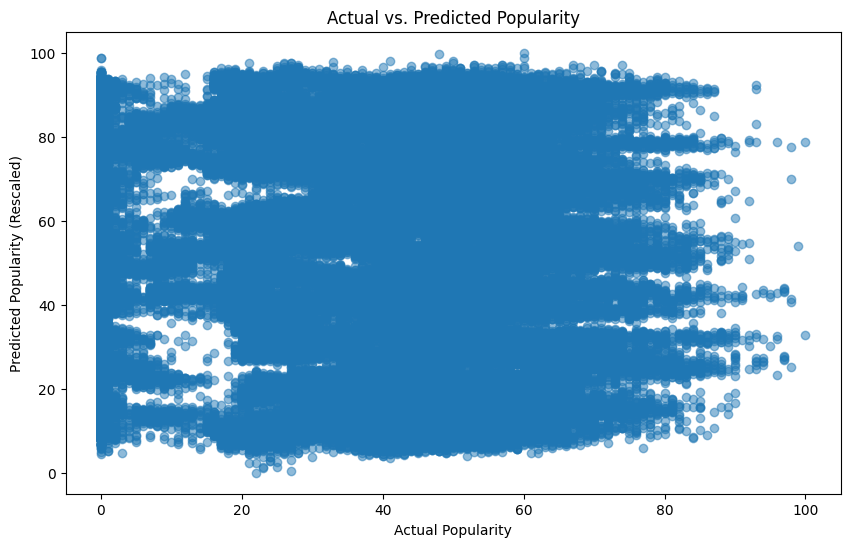

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming y_train and y_test are defined
#scaler_y = MinMaxScaler(feature_range=(0, 100))

# Fit the scaler on the target variable and transform it
#y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Train your model with X_train and y_train_scaled...
# Make sure to train the model here

# After predicting, detach the tensor and convert to a numpy array
#y_pred_tensor = RegNN(X_tensor_test)  # Example prediction step
#y_pred_detached = y_pred_tensor.detach().cpu().numpy()  # Detach and convert to numpy array
#_pred_rescaled = scaler_y.inverse_transform(y_pred_detached)  # Inverse transform the numpy array

# Now plot the rescaled predictions against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, scaled_values, alpha=0.5)
plt.title('Actual vs. Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity (Rescaled)')
plt.plot()
plt.show()

In [ ]:
X_processed 

<17100x36313 sparse matrix of type '<class 'numpy.float64'>'
	with 290700 stored elements in Compressed Sparse Row format>

In [ ]:
X_train

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Zack Tabudlo,Episode,Give Me Your Forever,244800,False,0.627,0.363,8,-8.127,1,0.0291,0.2790,0.000000,0.0928,0.3010,99.905,4,acoustic
1,Jason Mraz,Coffee Moment,93 Million Miles,216386,False,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,4,acoustic
2,Jason Mraz,Mellow Adult Pop,Bella Luna,302346,False,0.755,0.454,9,-9.609,0,0.0352,0.7570,0.000000,0.2360,0.3300,120.060,4,acoustic
3,Jason Mraz,Merry Christmas,Winter Wonderland,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.6640,145.363,4,acoustic
4,KT Tunstall,sadsadchristmas,Lonely This Christmas,257493,False,0.409,0.153,6,-10.740,0,0.0306,0.9390,0.000026,0.1080,0.1800,85.262,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17095,Lucas Cervetti,Trempülkalwe,Maremágnum,260506,False,0.405,0.283,4,-9.471,1,0.0300,0.8940,0.806000,0.1190,0.0813,99.947,4,world-music
17096,Mosaic MSC,HUMAN (Deluxe) [Live],Fountain (I Am Good) - Live,318874,False,0.438,0.577,5,-8.285,1,0.0357,0.0206,0.000013,0.2530,0.1140,139.983,4,world-music
17097,Dulces Sueños,#20 Sueños Vividos - Música Intrumental Suave ...,Sueños Vividos,335999,False,0.198,0.257,8,-17.361,1,0.0415,0.9680,0.949000,0.1100,0.0381,89.494,4,world-music
17098,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,384999,False,0.172,0.235,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music


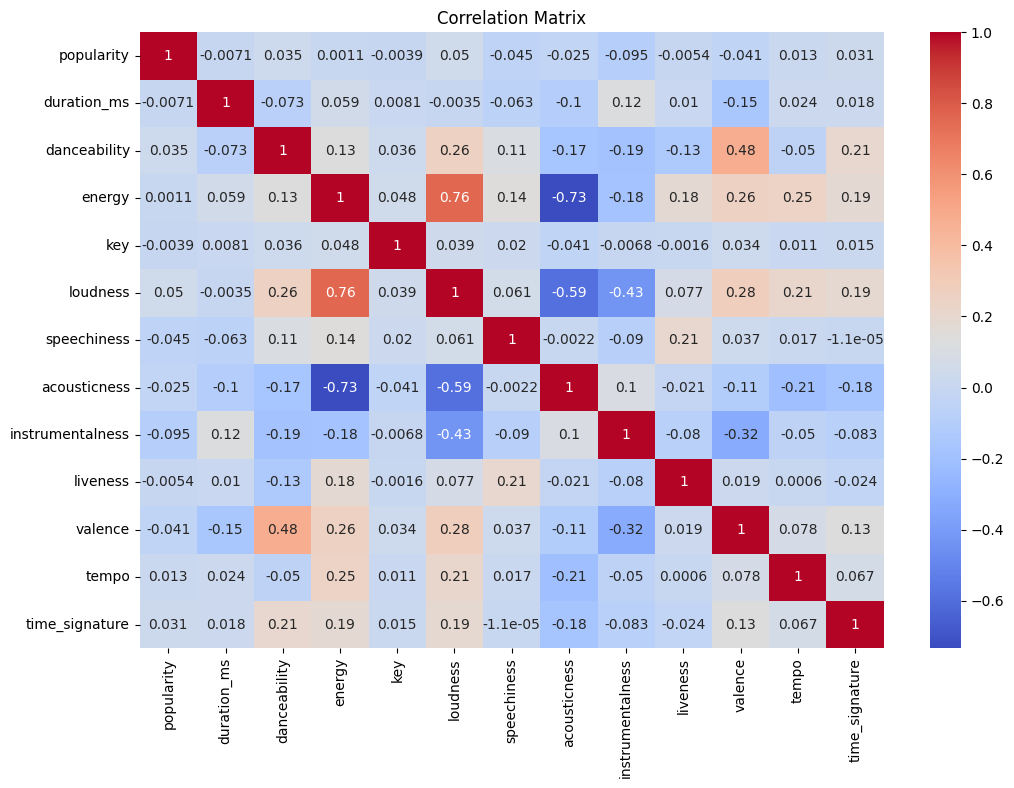

In [ ]:
numeric_cols = data.select_dtypes(include=[np.number])

# Correlation Matrix
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


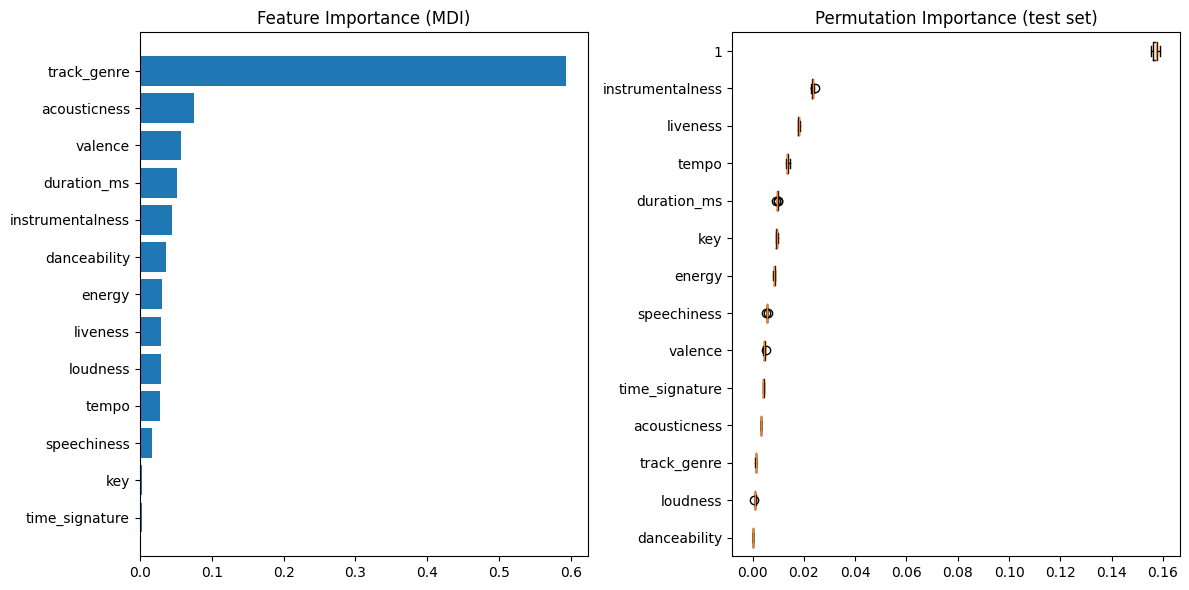

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer

def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    feature_names = []
    
    # Loop over all transformers in the ColumnTransformer
    for transformer_in_pipeline in column_transformer.transformers_:
        transformer_name, transformer, orig_feature_names = transformer_in_pipeline
        if isinstance(transformer, Pipeline):
            # If the transformer is a pipeline, extract the last transformer step
            transformer = transformer.steps[-1][1]

        if hasattr(transformer, 'get_feature_names_out'):
            # If the transformer has 'get_feature_names_out' method, use it
            names = transformer.get_feature_names_out(orig_feature_names)
        else:
            # Otherwise, use the original feature names
            names = orig_feature_names

        feature_names.extend(names)

    return feature_names

# Assuming 'model' is your pipeline and 'X_train' is your training dataset
preprocessor = model.named_steps['preprocessor']
feature_names = get_feature_names(preprocessor)

# Get feature importances
feature_importance = model.named_steps['regressor'].feature_importances_

# Sorting indices of feature importances
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

# Plotting feature importances
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

# Permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

# Plotting permutation importance
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV
from torch.utils.data import TensorDataset, DataLoader

# 1. Preprocess the data
X_processed_train = preprocessor.fit_transform(X_train)
y_processed_train = y_train
 # Assuming y is a single-column DataFrame or Series

# 2. Convert to tensors
X_tensor = torch.tensor(X_processed_train, dtype=torch.float32)
y_tensor = torch.tensor(y_processed_train, dtype=torch.float32)

# Create a TensorDataset and DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)



# Defining MLP Architecture
class MLPArch(nn.Module):
    def __init__(self, input_size, n_layers=4,activation=nn.ReLU):
        super().__init__()
        self.layers = []
        self.acts = []
        for i in range(n_layers):
            self.layers.append(nn.Linear(input_size,16))
            self.acts.append(activation())
            self.add_module(f"layer{i}", self.layers[-1])
            self.add_module(f"act{i}", self.acts[-1])
        self.output = nn.Linear(16, 7)
 
    def forward(self, x):
        for layer, act in zip(self.layers, self.acts):
            x = act(layer(x)) 
        x = self.output(x)
        return x
    
# Stating tuneable parameters    
param_gridArch1 = {
    'module__n_layers':[2, 5, 10, 20],
    'module__activation': [ nn.ReLU, nn.Softsign,
                           nn.Sigmoid],
    'module__input_size': [X_train.shape[1]],
}

#Fitting MLP too Skorch
modelArch = NeuralNetClassifier(
    MLPArch,
    criterion=torch.nn.CrossEntropyLoss,
    optimizer=torch.optim.Adam,
    lr=0.3,
    max_epochs=100,
    train_split=None,
)

#Using GridSearch to tune model architecture and search through combinations of MLP Layers and activation functions 
grid = GridSearchCV(estimator=modelArch, param_grid=param_gridArch1, scoring='accuracy', n_jobs=-1, cv=3)
grid_arch1 = grid.fit(X_train, y_train)